# 스케일링과 노말라이제이션

In [2]:
import pandas as pd
import numpy as np

from scipy import stats

from mlxtend.preprocessing import minmax_scaling

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Scaled data')

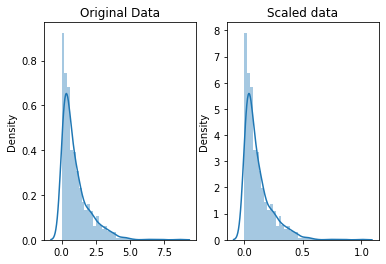

In [3]:
# 지수 분포에서 무작위로 추출한 1000개의 데이터 포인트 생성
original_data = np.random.exponential(size=1000)

# mix-max 0과 1 사이의 데이터 스케일
scaled_data = minmax_scaling(original_data, columns=[0])

# 비교하기 위해 둘 모두를 그래프로 그림
fig, ax = plt.subplots(1,2)
sns.distplot(original_data, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(scaled_data, ax=ax[1])
ax[1].set_title("Scaled data")

# 결측치

In [1]:
import pandas as pd
import numpy as np

nfl_data = pd.read_csv("NFL Play by Play 2009-2017 (v4).csv")

np.random.seed(0) 

In [2]:
# 열당 누락된(null 값의) 데이터의 수
missing_values_count = nfl_data.isnull().sum()

# 상위 10개의 열에서 누락된 데이터의 수 보기
missing_values_count[0:10]

Date              0
GameID            0
Drive             0
qtr               0
down            714
time              5
TimeUnder         0
TimeSecs          5
PlayTimeDiff     10
SideofField       8
dtype: int64

In [3]:
# 총 결측값의 수
total_cells = np.product(nfl_data.shape)
total_missing = missing_values_count.sum()

# 누락된 데이터 비율
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

24.959307642612032


In [4]:
nfl_data.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,ydstogo,ydsnet,GoalToGo,FirstDown,posteam,DefensiveTeam,desc,PlayAttempted,Yards.Gained,sp,Touchdown,ExPointResult,TwoPointConv,DefTwoPoint,Safety,Onsidekick,PuntResult,PlayType,Passer,Passer_ID,PassAttempt,PassOutcome,PassLength,AirYards,YardsAfterCatch,QBHit,PassLocation,InterceptionThrown,...,Accepted.Penalty,PenalizedTeam,PenaltyType,PenalizedPlayer,Penalty.Yards,PosTeamScore,DefTeamScore,ScoreDiff,AbsScoreDiff,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post,No_Score_Prob,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


In [5]:
nfl_data.dropna(axis=1)

,Date,GameID,Drive,qtr,TimeUnder,ydstogo,ydsnet,desc,PlayAttempted,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PlayType,Passer_ID,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,Rusher_ID,RushAttempt,Receiver_ID,Reception,Fumble,Sack,Challenge.Replay,Accepted.Penalty,Penalty.Yards,HomeTeam,AwayTeam,Timeout_Indicator,Timeout_Team,posteam_timeouts_pre,HomeTimeouts_Remaining_Pre,AwayTimeouts_Remaining_Pre,HomeTimeouts_Remaining_Post,AwayTimeouts_Remaining_Post
0,2009-09-10,2009091000,1,1,15,0,0,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,1,39,0,0,0,0,Kickoff,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3
1,2009-09-10,2009091000,1,1,15,10,5,(14:53) B.Roethlisberger pass short left to H....,1,5,0,0,0,0,Pass,00-0022924,1,-3,8,0,0,None,0,00-0017162,1,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3
2,2009-09-10,2009091000,1,1,15,5,2,(14:16) W.Parker right end to PIT 44 for -3 ya...,1,-3,0,0,0,0,Run,None,0,0,0,0,0,00-0022250,1,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3
3,2009-09-10,2009091000,1,1,14,8,2,(13:35) (Shotgun) B.Roethlisberger pass incomp...,1,0,0,0,0,0,Pass,00-0022924,1,34,0,0,0,None,0,00-0026901,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3
4,2009-09-10,2009091000,1,1,14,8,2,(13:27) (Punt formation) D.Sepulveda punts 54 ...,1,0,0,0,0,0,Punt,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,PIT,TEN,0,None,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4669,2009-09-20,2009092009,20,4,13,10,61,"(12:14) (No Huddle, Shotgun) T.Edwards pass in...",1,0,0,0,0,0,Pass,00-0025479,1,4,0,0,0,None,0,00-0024204,0,0,0,0,0,0,BUF,TB,0,None,3,3,3,3,3
4670,2009-09-20,2009092009,20,4,13,10,64,(12:09) (No Huddle) T.Edwards pass short right...,1,3,0,0,0,0,Pass,00-0025479,1,-3,6,0,0,None,0,00-0024204,1,0,0,0,0,0,BUF,TB,0,None,3,3,3,3,3
4671,2009-09-20,2009092009,20,4,12,0,64,Timeout #1 by TB at 11:27.,1,0,0,0,0,0,Timeout,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,BUF,TB,1,TB,3,3,3,3,2
4672,2009-09-20,2009092009,20,4,12,7,64,"(11:27) R.Lindell 27 yard field goal is GOOD, ...",1,0,1,0,0,0,Field Goal,None,0,0,0,0,0,None,0,None,0,0,0,0,0,0,BUF,TB,0,None,3,3,2,3,2


In [6]:
# 보기 쉽게 NFL 데이터셋에서 EPA 에서 Season 까지의 컬럼만을 추출
subset_nfl_data = nfl_data.loc[:, 'EPA':'Season'].head()
subset_nfl_data

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,NaN,NaN,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,NaN,NaN,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,NaN,NaN,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,NaN,NaN,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,NaN,NaN,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,NaN,NaN,2009.0


In [7]:
# 모든 Na값을 0으로 채우기
subset_nfl_data.fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,0.000000,0.000000,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,0.000000,0.000000,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,0.000000,0.000000,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.000000,0.000000,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


In [8]:
# 동일한 열에서 모든 NA 값을 다음에 오는 값으로 대체합니다.
# 나머지 na를 모두 0으로 바꿉니다.
subset_nfl_data.fillna(method='bfill', axis=0).fillna(0)

,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2.014474,-1.068169,1.146076,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,-0.032244,0.036899,2009.0
1,0.077907,-1.068169,1.146076,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,-0.032244,0.036899,2009.0
2,-1.402760,3.318841,-5.031425,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,0.106663,-0.156239,2009.0
3,-1.712583,3.318841,-5.031425,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,0.106663,-0.156239,2009.0
4,2.097796,0.000000,0.000000,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,0.000000,0.000000,2009.0


# 날짜 및 시간변수 처리

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

landslides = pd.read_csv("catalog.csv")

np.random.seed(0)

In [15]:
landslides.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,location_description,latitude,longitude,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,Unknown,38.6009,-77.2682,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,NaN,40.5175,-81.4305,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,Urban area,40.4377,-79.9160,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,Above river,45.3226,-73.7771,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,Below road,37.4325,-82.4931,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [16]:
print(landslides['date'].head())

0     3/2/07
1    3/22/07
2     4/6/07
3    4/14/07
4    4/15/07
Name: date, dtype: object


In [17]:
landslides['date'].dtype

dtype('O')

In [18]:
landslides['date_parsed'] = pd.to_datetime(landslides['date'], format="%m/%d/%y")

In [19]:
landslides['date_parsed'].head()

0   2007-03-02
1   2007-03-22
2   2007-04-06
3   2007-04-14
4   2007-04-15
Name: date_parsed, dtype: datetime64[ns]

In [20]:
day_of_month_landslides = landslides['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

# Pandas 활용

In [21]:
import pandas as pd

In [22]:
pd.DataFrame({'Yes': [50, 21], 'No': [131, 2]})


,Yes,No
0,50,131
1,21,2


In [23]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']})


,Bob,Sue
0,I liked it.,Pretty good.
1,It was awful.,Bland.


In [24]:
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 
              'Sue': ['Pretty good.', 'Bland.']},
             index=['Product A', 'Product B'])

,Bob,Sue
Product A,I liked it.,Pretty good.
Product B,It was awful.,Bland.


In [25]:
pd.Series([1, 2, 3, 4, 5])


0    1
1    2
2    3
3    4
4    5
dtype: int64

In [26]:
pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')


2015 Sales    30
2016 Sales    35
2017 Sales    40
Name: Product A, dtype: int64

In [28]:
wine_reviews = pd.read_csv("winemag-data-130k-v2.csv")

In [29]:
wine_reviews.shape

(10336, 14)

In [30]:
wine_reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


## Native accessors

In [31]:
wine_reviews.country

0              Italy
1           Portugal
2                 US
3                 US
4                 US
            ...     
10331    New Zealand
10332          Spain
10333          Italy
10334       Portugal
10335          Italy
Name: country, Length: 10336, dtype: object

In [32]:
wine_reviews['country']

0              Italy
1           Portugal
2                 US
3                 US
4                 US
            ...     
10331    New Zealand
10332          Spain
10333          Italy
10334       Portugal
10335          Italy
Name: country, Length: 10336, dtype: object

In [33]:
wine_reviews['country'][0]

'Italy'

## Indexing in pandas


In [34]:
wine_reviews.iloc[0]

Unnamed: 0                                                               0
country                                                              Italy
description              Aromas include tropical fruit, broom, brimston...
designation                                                   Vulkà Bianco
points                                                                  87
price                                                                  NaN
province                                                 Sicily & Sardinia
region_1                                                              Etna
region_2                                                               NaN
taster_name                                                  Kerin O’Keefe
taster_twitter_handle                                         @kerinokeefe
title                                    Nicosia 2013 Vulkà Bianco  (Etna)
variety                                                        White Blend
winery                   

In [35]:
wine_reviews.iloc[:, 0]

0            0
1            1
2            2
3            3
4            4
         ...  
10331    10331
10332    10332
10333    10333
10334    10334
10335    10335
Name: Unnamed: 0, Length: 10336, dtype: int64

In [36]:
wine_reviews.iloc[:3, 0]

0    0
1    1
2    2
Name: Unnamed: 0, dtype: int64

In [37]:
wine_reviews.iloc[1:3, 0]

1    1
2    2
Name: Unnamed: 0, dtype: int64

In [38]:
wine_reviews.iloc[-5:]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
10331,10331,New Zealand,The Awatere is a Marlborough subregion whose w...,NaN,90,22.0,Awatere Valley,NaN,NaN,Joe Czerwinski,@JoeCz,Vavasour 2008 Pinot Noir (Awatere Valley),Pinot Noir,Vavasour
10332,10332,Spain,A barrel-aged surprise. The nose is round and ...,Domillor Harvest Selection,90,19.0,Galicia,Ribeiro,NaN,Michael Schachner,@wineschach,Viña Mein 2009 Domillor Harvest Selection Whit...,White Blend,Viña Mein
10333,10333,Italy,"Aromas of smoky cigar, toasted note and black ...",NaN,90,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Máté 2005 Brunello di Montalcino,Sangiovese Grosso,Máté
10334,10334,Portugal,"Fine grain tannins, with an aroma of light smo...",Quinta da Pisca Vintage,90,90.0,Port,NaN,NaN,Roger Voss,@vossroger,Niepoort 2008 Quinta da Pisca Vintage (Port),Port,Niepoort
10335,10335,Italy,Sassabruna is a Sangiovese-based wine with an ...,Sassabruna,90,25.0,Tuscany,Monteregio di Massa Marittima,NaN,NaN,NaN,Rocca di Montemassi 2006 Sassabruna (Montereg...,San,NaN


In [39]:
wine_reviews.loc[0, 'country']

'Italy'

In [40]:
wine_reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]

,taster_name,taster_twitter_handle,points
0,Kerin O’Keefe,@kerinokeefe,87
1,Roger Voss,@vossroger,87
2,Paul Gregutt,@paulgwine,87
3,Alexander Peartree,NaN,87
4,Paul Gregutt,@paulgwine,87
...,...,...,...
10331,Joe Czerwinski,@JoeCz,90
10332,Michael Schachner,@wineschach,90
10333,NaN,NaN,90
10334,Roger Voss,@vossroger,90


## Manipulating the index


In [41]:
wine_reviews.set_index("title")

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,variety,winery
title,,,,,,,,,,,,,
Nicosia 2013 Vulkà Bianco (Etna),0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,White Blend,Nicosia
Quinta dos Avidagos 2011 Avidagos Red (Douro),1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Portuguese Red,Quinta dos Avidagos
Rainstorm 2013 Pinot Gris (Willamette Valley),2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Gris,Rainstorm
St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,Riesling,St. Julian
Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vavasour 2008 Pinot Noir (Awatere Valley),10331,New Zealand,The Awatere is a Marlborough subregion whose w...,NaN,90,22.0,Awatere Valley,NaN,NaN,Joe Czerwinski,@JoeCz,Pinot Noir,Vavasour
Viña Mein 2009 Domillor Harvest Selection White (Ribeiro),10332,Spain,A barrel-aged surprise. The nose is round and ...,Domillor Harvest Selection,90,19.0,Galicia,Ribeiro,NaN,Michael Schachner,@wineschach,White Blend,Viña Mein
Máté 2005 Brunello di Montalcino,10333,Italy,"Aromas of smoky cigar, toasted note and black ...",NaN,90,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Sangiovese Grosso,Máté


## Conditional selection


In [42]:
wine_reviews.country == 'Italy'

0         True
1        False
2        False
3        False
4        False
         ...  
10331    False
10332    False
10333     True
10334    False
10335     True
Name: country, Length: 10336, dtype: bool

In [49]:
wine_reviews.loc[wine_reviews.country == 'Italy']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
13,13,Italy,This is dominated by oak and oak-driven aromas...,Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2012 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
22,22,Italy,Delicate aromas recall white flower and citrus...,Ficiligno,87,19.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Baglio di Pianetto 2007 Ficiligno White (Sicilia),White Blend,Baglio di Pianetto
24,24,Italy,"Aromas of prune, blackcurrant, toast and oak c...",Aynat,87,35.0,Sicily & Sardinia,Sicilia,NaN,Kerin O’Keefe,@kerinokeefe,Canicattì 2009 Aynat Nero d'Avola (Sicilia),Nero d'Avola,Canicattì
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10287,10287,Italy,"A blend of Cabernet Franc, Cabernet Sauvignon,...",Vigna Santella del Gröm,88,26.0,Lombardy,Curtefranca,NaN,NaN,NaN,Ricci Curbastro 2008 Vigna Santella del Gröm R...,Red Blend,Ricci Curbastro
10323,10323,Italy,This luminous and delicately pink sparkling wi...,Tridentum Brut Rosé,90,24.0,Northeastern Italy,Trento,NaN,NaN,NaN,Cesarini Sforza NV Tridentum Brut Rosé Pinot N...,Pinot Nero,Cesarini Sforza
10330,10330,Italy,"Carob, sour cherry, bramble, leafy greens and ...",NaN,90,80.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Le Ragnaie 2006 Brunello di Montalcino,Sangiovese Grosso,Le Ragnaie
10333,10333,Italy,"Aromas of smoky cigar, toasted note and black ...",NaN,90,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Máté 2005 Brunello di Montalcino,Sangiovese Grosso,Máté


In [50]:
wine_reviews.loc[(wine_reviews.country == 'Italy') & (wine_reviews.points >= 90)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
120,120,Italy,"Slightly backward, particularly given the vint...",Bricco Rocche Prapó,92,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Prapó (Barolo),Nebbiolo,Ceretto
130,130,Italy,"At the first it was quite muted and subdued, b...",Bricco Rocche Brunate,91,70.0,Piedmont,Barolo,NaN,NaN,NaN,Ceretto 2003 Bricco Rocche Brunate (Barolo),Nebbiolo,Ceretto
133,133,Italy,"Einaudi's wines have been improving lately, an...",NaN,91,68.0,Piedmont,Barolo,NaN,NaN,NaN,Poderi Luigi Einaudi 2003 Barolo,Nebbiolo,Poderi Luigi Einaudi
135,135,Italy,The color is just beginning to show signs of b...,Sorano,91,60.0,Piedmont,Barolo,NaN,NaN,NaN,Giacomo Ascheri 2001 Sorano (Barolo),Nebbiolo,Giacomo Ascheri
140,140,Italy,"A big, fat, luscious wine with plenty of toast...",Costa Bruna,90,26.0,Piedmont,Barbera d'Alba,NaN,NaN,NaN,Poderi Colla 2005 Costa Bruna (Barbera d'Alba),Barbera,Poderi Colla
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10243,10243,Italy,Made with 50% Sangiovese and a blend of Cabern...,Rosso di Notri,91,20.0,Tuscany,Toscana,NaN,Kerin O’Keefe,@kerinokeefe,Tua Rita 2013 Rosso di Notri Red (Toscana),Red Blend,Tua Rita
10323,10323,Italy,This luminous and delicately pink sparkling wi...,Tridentum Brut Rosé,90,24.0,Northeastern Italy,Trento,NaN,NaN,NaN,Cesarini Sforza NV Tridentum Brut Rosé Pinot N...,Pinot Nero,Cesarini Sforza
10330,10330,Italy,"Carob, sour cherry, bramble, leafy greens and ...",NaN,90,80.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Le Ragnaie 2006 Brunello di Montalcino,Sangiovese Grosso,Le Ragnaie
10333,10333,Italy,"Aromas of smoky cigar, toasted note and black ...",NaN,90,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Máté 2005 Brunello di Montalcino,Sangiovese Grosso,Máté


In [51]:
wine_reviews.loc[wine_reviews.country.isin(['Italy', 'France'])]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam
11,11,France,"This is a dry wine, very spicy, with a tight, ...",NaN,87,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Leon Beyer 2012 Gewurztraminer (Alsace),Gewürztraminer,Leon Beyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10324,10324,France,A new cuvée (this is the second vintage) from ...,Les Charmes,90,NaN,Loire Valley,Chinon,NaN,Roger Voss,@vossroger,Charles Joguet 2009 Les Charmes (Chinon),Cabernet Franc,Charles Joguet
10327,10327,France,"Obviously young, but with good acidity as well...",NaN,90,18.0,Loire Valley,Saumur-Champigny,NaN,Roger Voss,@vossroger,Domaine des Roches Neuves 2010 Saumur-Champigny,Cabernet Franc,Domaine des Roches Neuves
10330,10330,Italy,"Carob, sour cherry, bramble, leafy greens and ...",NaN,90,80.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Le Ragnaie 2006 Brunello di Montalcino,Sangiovese Grosso,Le Ragnaie
10333,10333,Italy,"Aromas of smoky cigar, toasted note and black ...",NaN,90,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Máté 2005 Brunello di Montalcino,Sangiovese Grosso,Máté


In [52]:
wine_reviews.loc[wine_reviews.price.notnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,10331,New Zealand,The Awatere is a Marlborough subregion whose w...,NaN,90,22.0,Awatere Valley,NaN,NaN,Joe Czerwinski,@JoeCz,Vavasour 2008 Pinot Noir (Awatere Valley),Pinot Noir,Vavasour
10332,10332,Spain,A barrel-aged surprise. The nose is round and ...,Domillor Harvest Selection,90,19.0,Galicia,Ribeiro,NaN,Michael Schachner,@wineschach,Viña Mein 2009 Domillor Harvest Selection Whit...,White Blend,Viña Mein
10333,10333,Italy,"Aromas of smoky cigar, toasted note and black ...",NaN,90,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Máté 2005 Brunello di Montalcino,Sangiovese Grosso,Máté
10334,10334,Portugal,"Fine grain tannins, with an aroma of light smo...",Quinta da Pisca Vintage,90,90.0,Port,NaN,NaN,Roger Voss,@vossroger,Niepoort 2008 Quinta da Pisca Vintage (Port),Port,Niepoort


## Assigning data


In [53]:
wine_reviews['critic'] = 'everyone'
wine_reviews['critic']

0        everyone
1        everyone
2        everyone
3        everyone
4        everyone
           ...   
10331    everyone
10332    everyone
10333    everyone
10334    everyone
10335    everyone
Name: critic, Length: 10336, dtype: object

## Summary functions


In [54]:
wine_reviews.points.describe()

count    10336.000000
mean        88.395511
std          2.978380
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: points, dtype: float64

In [55]:
wine_reviews.taster_name.describe()

count           8261
unique            18
top       Roger Voss
freq            2014
Name: taster_name, dtype: object

In [56]:
wine_reviews.points.mean()

88.39551083591331

In [57]:
wine_reviews.taster_name.unique()

array(['Kerin O’Keefe', 'Roger Voss', 'Paul Gregutt',
       'Alexander Peartree', 'Michael Schachner', 'Anna Lee C. Iijima',
       'Virginie Boone', 'Matt Kettmann', nan, 'Sean P. Sullivan',
       'Jim Gordon', 'Joe Czerwinski', 'Anne Krebiehl\xa0MW',
       'Lauren Buzzeo', 'Mike DeSimone', 'Jeff Jenssen',
       'Susan Kostrzewa', 'Carrie Dykes', 'Fiona Adams'], dtype=object)

In [58]:
wine_reviews.taster_name.value_counts()

Roger Voss            2014
Michael Schachner     1256
Kerin O’Keefe          886
Virginie Boone         802
Paul Gregutt           737
Matt Kettmann          493
Joe Czerwinski         419
Sean P. Sullivan       376
Jim Gordon             340
Anna Lee C. Iijima     325
Anne Krebiehl MW       230
Lauren Buzzeo          146
Susan Kostrzewa        111
Alexander Peartree      41
Jeff Jenssen            40
Mike DeSimone           36
Carrie Dykes             6
Fiona Adams              3
Name: taster_name, dtype: int64

## Maps

In [59]:
review_points_mean = wine_reviews.points.mean()
wine_reviews.points.map(lambda p: p - review_points_mean)

0       -1.395511
1       -1.395511
2       -1.395511
3       -1.395511
4       -1.395511
           ...   
10331    1.604489
10332    1.604489
10333    1.604489
10334    1.604489
10335    1.604489
Name: points, Length: 10336, dtype: float64

In [60]:
def remean_points(row):
    row.points = row.points - review_points_mean
    return row

wine_reviews.apply(remean_points, axis='columns')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,-1.395511,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,-1.395511,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,everyone
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,-1.395511,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,everyone
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,-1.395511,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,everyone
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,-1.395511,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,everyone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10331,10331,New Zealand,The Awatere is a Marlborough subregion whose w...,NaN,1.604489,22.0,Awatere Valley,NaN,NaN,Joe Czerwinski,@JoeCz,Vavasour 2008 Pinot Noir (Awatere Valley),Pinot Noir,Vavasour,everyone
10332,10332,Spain,A barrel-aged surprise. The nose is round and ...,Domillor Harvest Selection,1.604489,19.0,Galicia,Ribeiro,NaN,Michael Schachner,@wineschach,Viña Mein 2009 Domillor Harvest Selection Whit...,White Blend,Viña Mein,everyone
10333,10333,Italy,"Aromas of smoky cigar, toasted note and black ...",NaN,1.604489,60.0,Tuscany,Brunello di Montalcino,NaN,NaN,NaN,Máté 2005 Brunello di Montalcino,Sangiovese Grosso,Máté,everyone
10334,10334,Portugal,"Fine grain tannins, with an aroma of light smo...",Quinta da Pisca Vintage,1.604489,90.0,Port,NaN,NaN,Roger Voss,@vossroger,Niepoort 2008 Quinta da Pisca Vintage (Port),Port,Niepoort,everyone


In [61]:
wine_reviews.head(1)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,everyone


In [62]:
review_points_mean = wine_reviews.points.mean()
wine_reviews.points - review_points_mean

0       -1.395511
1       -1.395511
2       -1.395511
3       -1.395511
4       -1.395511
           ...   
10331    1.604489
10332    1.604489
10333    1.604489
10334    1.604489
10335    1.604489
Name: points, Length: 10336, dtype: float64

In [63]:
wine_reviews.country + " - " + wine_reviews.region_1

0                                 Italy - Etna
1                                          NaN
2                       US - Willamette Valley
3                     US - Lake Michigan Shore
4                       US - Willamette Valley
                         ...                  
10331                                      NaN
10332                          Spain - Ribeiro
10333           Italy - Brunello di Montalcino
10334                                      NaN
10335    Italy - Monteregio di Massa Marittima
Length: 10336, dtype: object

## Groupwise analysis


In [64]:
wine_reviews.groupby('points').points.count()

points
80       16
81       42
82      129
83      274
84      450
85      793
86     1043
87     1491
88     1417
89      986
90     1131
91      786
92      828
93      514
94      244
95      122
96       42
97       18
98        6
99        2
100       2
Name: points, dtype: int64

In [65]:
wine_reviews.groupby('points').price.min()

points
80       8.0
81       7.0
82       6.0
83       5.0
84       5.0
85       4.0
86       5.0
87       6.0
88       7.0
89       8.0
90       8.0
91      12.0
92      13.0
93      13.0
94      18.0
95      20.0
96      29.0
97      50.0
98      50.0
99      94.0
100    210.0
Name: price, dtype: float64

In [66]:
wine_reviews.groupby('winery').apply(lambda df: df.title.iloc[0])

winery
12 Linajes                   12 Linajes 2009 Reserva  (Ribera del Duero)
14 Hands                             14 Hands 2010 Riesling (Washington)
181                                               181 2008 Merlot (Lodi)
18401 Cellars          18401 Cellars 2013 Cabernet Sauvignon (Walla W...
1912 Winemakers        1912 Winemakers 2011 Vinhas Velhas Branco Whit...
                                             ...                        
Árido                    Árido 2013 Sustainably Farmed Moscato (Mendoza)
Écluse                           Écluse 2014 Rendition Red (Paso Robles)
Ökonomierat Rebholz    Ökonomierat Rebholz 2007 Von Rotliegenden Spät...
àMaurice               àMaurice 2013 Fred Estate Syrah (Walla Walla V...
Štoka                                    Štoka 2009 Izbrani Teran (Kras)
Length: 5600, dtype: object

In [67]:
wine_reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

Unnamed: 0  ...    critic
country   province                      ...          
Argentina Mendoza Province        8869  ...  everyone
          Other                   4633  ...  everyone
Armenia   Armenia                 8170  ...  everyone
Australia Australia Other          893  ...  everyone
          New South Wales         5290  ...  everyone
...                                ...  ...       ...
US        Washington              1556  ...  everyone
Uruguay   Atlantida               6969  ...  everyone
          Canelones               4051  ...  everyone
          Juanico                 9133  ...  everyone
          Uruguay                 6005  ...  everyone

[244 rows x 15 columns]

In [68]:
wine_reviews.groupby(['country']).price.agg([len, min, max])

,len,min,max
country,,,
Argentina,327.0,6.0,215.0
Armenia,1.0,14.0,14.0
Australia,195.0,7.0,350.0
Austria,247.0,10.0,99.0
Brazil,2.0,31.0,36.0
Bulgaria,9.0,8.0,22.0
Canada,21.0,12.0,80.0
Chile,406.0,5.0,200.0
Croatia,5.0,19.0,27.0


## Multi-indexes

In [69]:
countries_reviewed = wine_reviews.groupby(['country', 'province']).description.agg([len])
countries_reviewed

len
country   province             
Argentina Mendoza Province  282
          Other              45
Armenia   Armenia             1
Australia Australia Other    25
          New South Wales     2
...                         ...
US        Washington        685
Uruguay   Atlantida           1
          Canelones           2
          Juanico             1
          Uruguay             1

[244 rows x 1 columns]

In [70]:
mi = countries_reviewed.index
type(mi)

pandas.core.indexes.multi.MultiIndex

In [71]:
countries_reviewed.reset_index()

,country,province,len
0,Argentina,Mendoza Province,282
1,Argentina,Other,45
2,Armenia,Armenia,1
3,Australia,Australia Other,25
4,Australia,New South Wales,2
...,...,...,...
239,US,Washington,685
240,Uruguay,Atlantida,1
241,Uruguay,Canelones,2
242,Uruguay,Juanico,1


## Sorting

In [72]:
countries_reviewed = countries_reviewed.reset_index()
countries_reviewed.sort_values(by='len')

,country,province,len
243,Uruguay,Uruguay,1
131,Luxembourg,Moselle Luxembourgeoise,1
129,Lebanon,Bekaa Valley,1
123,Italy,Northwestern Italy,1
242,Uruguay,Juanico,1
...,...,...,...
235,US,Oregon,409
69,France,Bordeaux,448
127,Italy,Tuscany,450
239,US,Washington,685


In [73]:
countries_reviewed.sort_values(by='len', ascending=False)

,country,province,len
223,US,California,2882
239,US,Washington,685
127,Italy,Tuscany,450
69,France,Bordeaux,448
235,US,Oregon,409
...,...,...,...
15,Austria,Steiermark,1
123,Italy,Northwestern Italy,1
117,Israel,Shomron,1
116,Israel,Samson,1


In [74]:
countries_reviewed.sort_index()

,country,province,len
0,Argentina,Mendoza Province,282
1,Argentina,Other,45
2,Armenia,Armenia,1
3,Australia,Australia Other,25
4,Australia,New South Wales,2
...,...,...,...
239,US,Washington,685
240,Uruguay,Atlantida,1
241,Uruguay,Canelones,2
242,Uruguay,Juanico,1


In [75]:
countries_reviewed.sort_values(by=['country', 'len'])

,country,province,len
1,Argentina,Other,45
0,Argentina,Mendoza Province,282
2,Armenia,Armenia,1
4,Australia,New South Wales,2
6,Australia,Tasmania,6
...,...,...,...
223,US,California,2882
240,Uruguay,Atlantida,1
242,Uruguay,Juanico,1
243,Uruguay,Uruguay,1


## Dtypes


In [76]:
wine_reviews.price.dtype

dtype('float64')

In [77]:
wine_reviews.dtypes

Unnamed: 0                 int64
country                   object
description               object
designation               object
points                     int64
price                    float64
province                  object
region_1                  object
region_2                  object
taster_name               object
taster_twitter_handle     object
title                     object
variety                   object
winery                    object
critic                    object
dtype: object

In [78]:
wine_reviews.points.astype('float64')

0        87.0
1        87.0
2        87.0
3        87.0
4        87.0
         ... 
10331    90.0
10332    90.0
10333    90.0
10334    90.0
10335    90.0
Name: points, Length: 10336, dtype: float64

In [79]:
wine_reviews.index.dtype

dtype('int64')

## Missing data

In [80]:
wine_reviews[pd.isnull(wine_reviews.country)]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,critic
913,913,NaN,"Amber in color, this wine has aromas of peach ...",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2014 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines,everyone
3131,3131,NaN,"Soft, fruity and juicy, this is a pleasant, si...",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier,everyone
4243,4243,NaN,"Violet-red in color, this semisweet wine has a...",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2012 Red Natur...,Ojaleshi,Kakhetia Traditional Winemaking,everyone
9509,9509,NaN,This mouthwatering blend starts with a nose of...,Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2015 Theopetra Malagouzia-Assyrtiko W...,White Blend,Tsililis,everyone
9750,9750,NaN,This orange-style wine has a cloudy yellow-gol...,Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2015 Orange Nikolaevo Vineyard Chardo...,Chardonnay,Ross-idi,everyone


In [81]:
wine_reviews.region_2.fillna("Unknown")

0                  Unknown
1                  Unknown
2        Willamette Valley
3                  Unknown
4        Willamette Valley
               ...        
10331              Unknown
10332              Unknown
10333              Unknown
10334              Unknown
10335              Unknown
Name: region_2, Length: 10336, dtype: object

In [82]:
wine_reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

0            @kerino
1         @vossroger
2        @paulgwine 
3                NaN
4        @paulgwine 
            ...     
10331         @JoeCz
10332    @wineschach
10333            NaN
10334     @vossroger
10335            NaN
Name: taster_twitter_handle, Length: 10336, dtype: object